<a href="https://colab.research.google.com/github/ivanhazda/goit-algo-hw-03/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1. Приклад кластеризації.

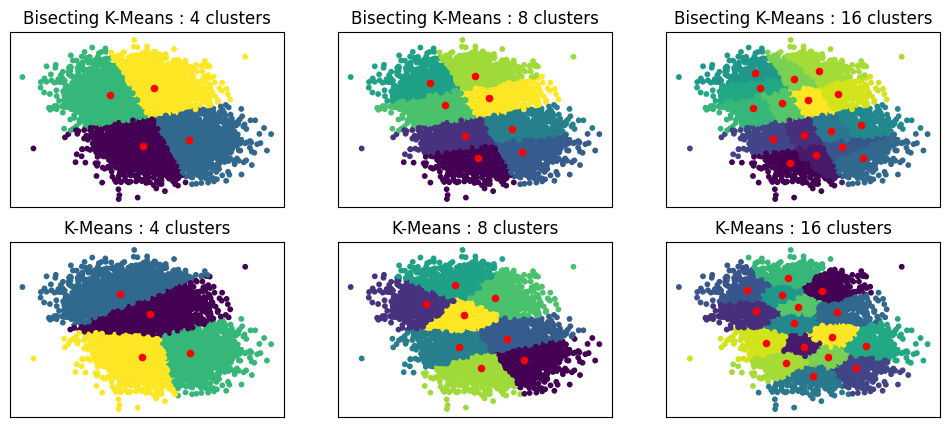

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.datasets import make_blobs


# Generate sample data
n_samples = 10000
random_state = 0

X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [4, 8, 16]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

**Завдання 2. Різні алгоритми кластеризації.**

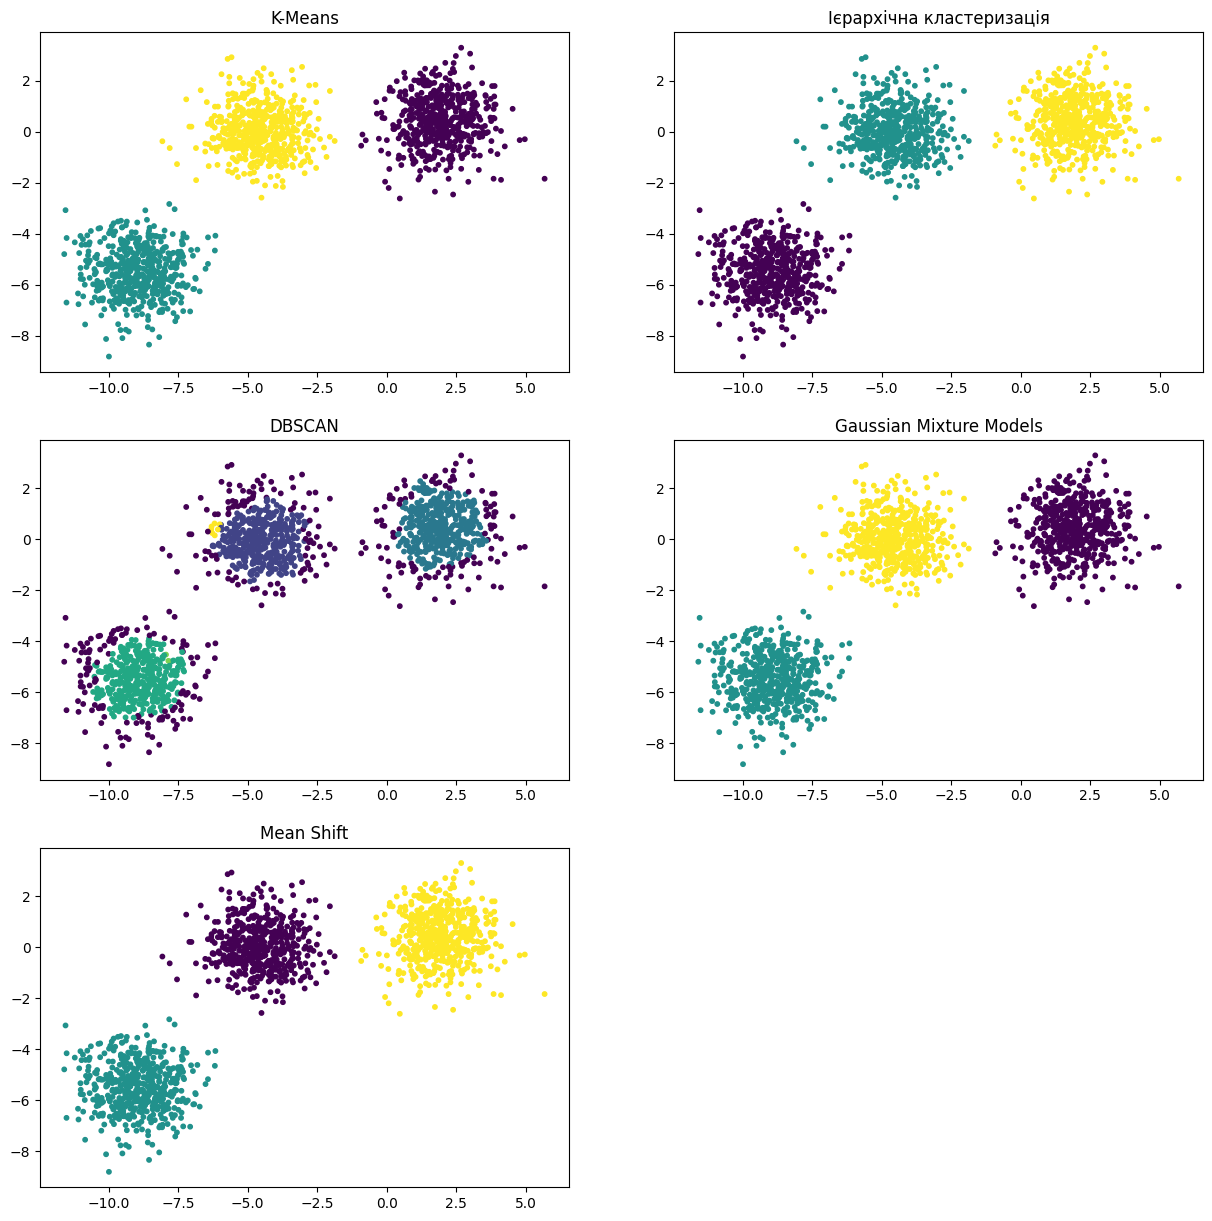

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import numpy as np

# Генерація даних
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Визначення кількості кластерів
n_clusters = 3

# Метод K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
y_kmeans = kmeans.fit_predict(X)

# Ієрархічна кластеризація (Agglomerative Clustering)
agglo = AgglomerativeClustering(n_clusters=n_clusters)
y_agglo = agglo.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(X)

# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=n_clusters, random_state=random_state)
y_gmm = gmm.fit_predict(X)

# Mean Shift
mean_shift = MeanShift()
y_mean_shift = mean_shift.fit_predict(X)

# Візуалізація результатів
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# K-Means
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
axs[0, 0].set_title('K-Means')

# Ієрархічна кластеризація
axs[0, 1].scatter(X[:, 0], X[:, 1], c=y_agglo, s=10, cmap='viridis')
axs[0, 1].set_title('Ієрархічна кластеризація')

# DBSCAN
axs[1, 0].scatter(X[:, 0], X[:, 1], c=y_dbscan, s=10, cmap='viridis')
axs[1, 0].set_title('DBSCAN')

# Gaussian Mixture Models (GMM)
axs[1, 1].scatter(X[:, 0], X[:, 1], c=y_gmm, s=10, cmap='viridis')
axs[1, 1].set_title('Gaussian Mixture Models')

# Mean Shift
axs[2, 0].scatter(X[:, 0], X[:, 1], c=y_mean_shift, s=10, cmap='viridis')
axs[2, 0].set_title('Mean Shift')

# Залишаємо останню ячейку порожньою
axs[2, 1].axis('off')

plt.show()



Завдання 3.

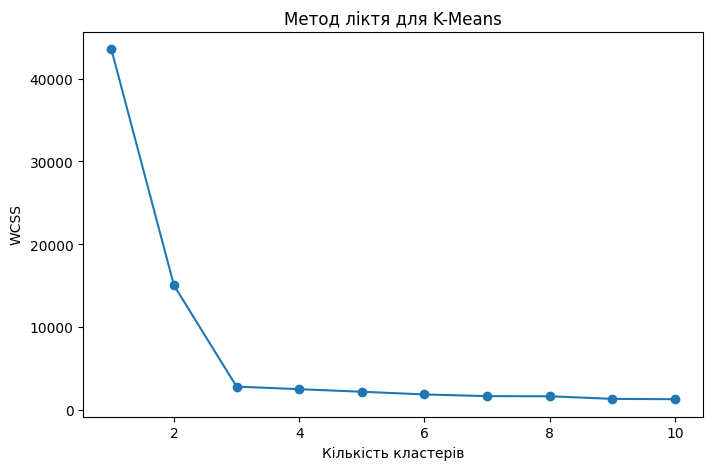

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Генерація даних
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Визначення кількості кластерів для тестування
k_range = range(1, 11)
wcss = []

# KMeans
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Побудова графіку методу ліктя
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Метод ліктя для K-Means')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

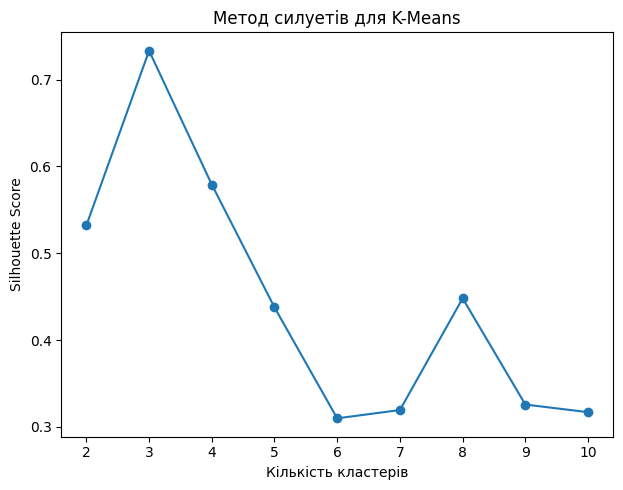

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Генерація даних
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Визначення кількості кластерів для тестування
k_range = range(2, 11)
silhouette_scores_kmeans = []
silhouette_scores_gmm = []

# Обчислення silhouette_score для кожного значення k для K-Means
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    labels_kmeans = kmeans.fit_predict(X)
    score = silhouette_score(X, labels_kmeans)
    silhouette_scores_kmeans.append(score)


# Побудова графіку методу силуетів для K-Means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores_kmeans, marker='o')
plt.title('Метод силуетів для K-Means')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')


plt.tight_layout()
plt.show()


**Приклад кластеризації з Yellowbrick**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt

In [ ]:
# 1. Створення штучних даних
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)


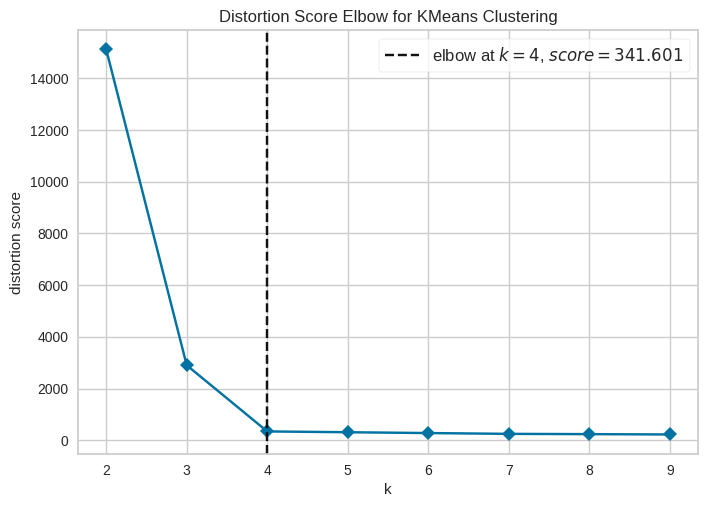

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# 2. Метод ліктя (Elbow method)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X)        # Підбір моделі
visualizer.show()        # Відображення графіка

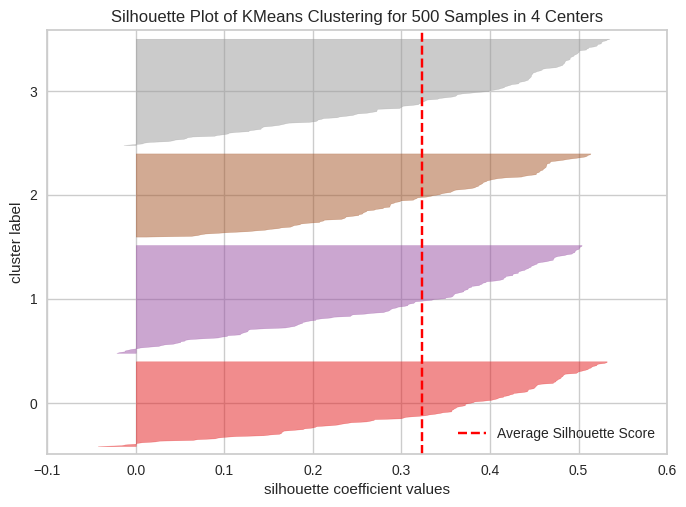

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 500 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# 3. Метод силуетів (Silhouette method)
plt.figure()
model = KMeans(n_clusters=4, random_state=42)  # Замінити 4 на потрібну кількість кластерів
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)
visualizer.show()

**PCA **

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create a sample dataset
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])
# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
# Create a PCA instance
pca = PCA(n_components=2)  # Specify the number of components
# Fit PCA to the standardized data
pca.fit(data_std)
# Transform the data into the reduced dimensionality
data_pca = pca.transform(data_std)
# The principal components
components = pca.components_
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Print the results
print("Original Data:")
print(data)
print("\nStandardized Data:")
print(data_std)
print("\nPrincipal Components:")
print(components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print("\nData in Reduced Dimensionality:")
print(data_pca)

Original Data:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

Principal Components:
[[ 0.57735027  0.57735027  0.57735027]
 [ 0.         -0.70710678  0.70710678]]

Explained Variance Ratio:
[1. 0.]

Data in Reduced Dimensionality:
[[-2.12132034e+00 -4.36708632e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.12132034e+00  4.36708632e-16]]


**ПРИКЛАД РСА**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [ ]:
# 1. Завантаження даних (можна замінити на свій датафрейм)
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# 2. PCA — зменшуємо до 2 компонент для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Побудова датафрейму з PCA-координатами
df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
df_pca["target"] = y



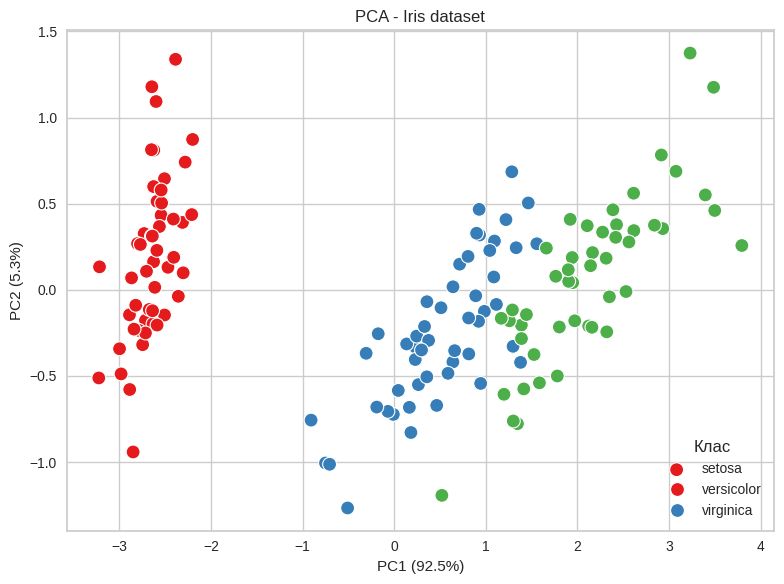

In [ ]:
# 4. Візуалізація
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="target", palette="Set1", s=100)
plt.title("PCA - Iris dataset")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Клас", labels=target_names)
plt.grid(True)
plt.tight_layout()
plt.show()

**Завдання 4. Рекомендаційні системи.**

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357229 sha256=7decdc8f4c6e8de3e783aa4abe6c1ccb74389447f4b6aedd28edaffd723bf3f9
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


Завдання

In [ ]:
from surprise import AlgoBase, Dataset, Reader
from surprise.model_selection import train_test_split
import numpy as np
import pandas as pd

class MyOwnAlgorithm(AlgoBase):
    def __init__(self):
        # Завжди викликаємо базовий метод перед будь-якими діями
        super().__init__()

    def fit(self, trainset):
        #  викликаємо базовий метод перед будь-якими діями
        super().fit(trainset)

        # Обчислюємо середнє значення рейтингу
        self.the_mean = np.mean([r for (_, _, r) in self.trainset.all_ratings()])

        # Обчислюємо середній рейтинг для кожного користувача
        self.user_means = {}
        for u in self.trainset.all_users():
            self.user_means[u] = np.mean([r for (_, r) in self.trainset.ur[u]])

        # Обчислюємо середній рейтинг для кожного фільму
        self.item_means = {}
        for i in self.trainset.all_items():
            self.item_means[i] = np.mean([r for (_, r) in self.trainset.ir[i]])

        return self

    def estimate(self, u, i):
        if self.trainset.knows_user(u) and self.trainset.knows_item(i):
            user_mean = self.user_means.get(u, self.trainset.global_mean)
            item_mean = self.item_means.get(i, self.trainset.global_mean)
            return (user_mean + item_mean) / 2
        else:
            return self.trainset.global_mean

# Завантажуємо дані
data = Dataset.load_builtin('ml-100k')

# Розділяємо дані на тренувальний та тестовий набори
trainset, testset = train_test_split(data, test_size=0.2)

# Навчаємо алгоритм
my_algo = MyOwnAlgorithm()
my_algo.fit(trainset)

# Вибір існуючого користувача з тренувального набору
user_id = list(trainset.all_users())[0]

# Прогнозуємо рейтинги для всіх фільмів для конкретного користувача
all_movie_ids = trainset.all_items()
predictions = [(trainset.to_raw_iid(i), my_algo.estimate(user_id, i)) for i in all_movie_ids]

# Сортуємо прогнози за рейтингом у спадному порядку
predictions.sort(key=lambda x: x[1], reverse=True)

# Виводимо фільми із найвищими спрогнозованими рейтингами
top_predictions = predictions[:100]

# Створюємо DataFrame для кращого відображення
top_df = pd.DataFrame(top_predictions, columns=['MovieID', 'PredictedRating'])
print(top_df)


   MovieID  PredictedRating
0     1500         4.208333
1     1536         4.208333
2     1189         4.208333
3     1599         4.208333
4     1201         4.208333
..     ...              ...
95     633         3.754630
96     909         3.753788
97     493         3.750887
98     487         3.749317
99     124         3.748874

[100 rows x 2 columns]


In [ ]:
import pandas as pd
data = {
    "name": {"1": "Michael", "2": "John", "3": "Liza"},
    "country": {"1": "Canada", "2": "USA", "3": "Australia"},
    "age": {"1": 25, "2": 32, "3": 19}
}
employees = pd.DataFrame(data)
new_employee = pd.Series(data=["Jhon", "Denmark", 23], index=["name", "country", "age"])
employees = pd.concat([employees, new_employee.to_frame().T], ignore_index=True)
employees

,name,country,age
0,Michael,Canada,25
1,John,USA,32
2,Liza,Australia,19
3,Jhon,Denmark,23
